In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (rename it if needed)
df = pd.read_csv('spotify_history.csv')
df.head()


,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


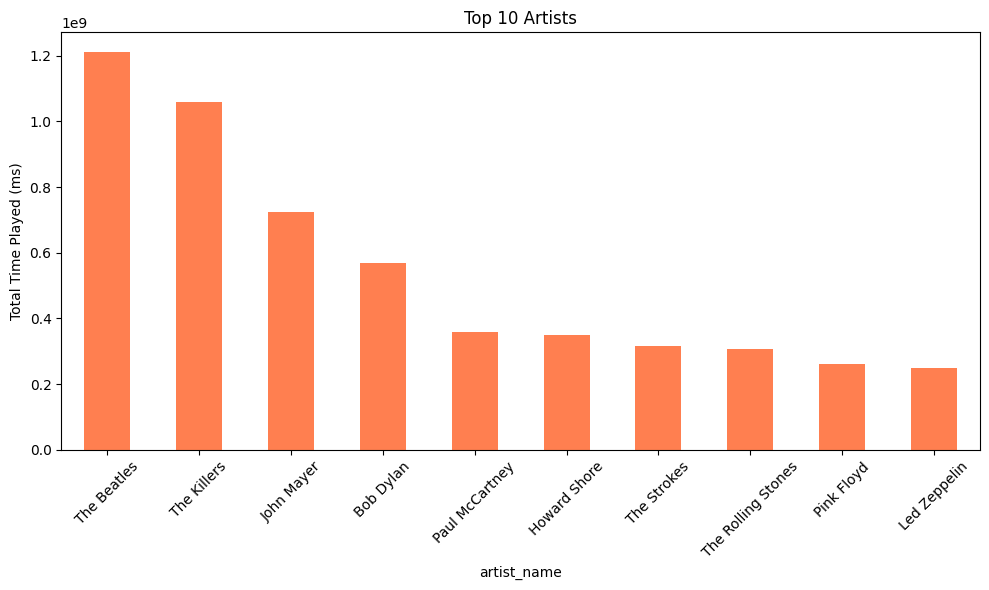

In [6]:
top_artists = df.groupby('artist_name')['ms_played'].sum().sort_values(ascending=False).head(10)

top_artists.plot(kind='bar', figsize=(10, 6), color='coral')
plt.title('Top 10 Artists')
plt.ylabel('Total Time Played (ms)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [7]:
# Drop rows with missing track name or play time
df.dropna(subset=['track_name', 'ms_played'], inplace=True)

# Convert timestamp column to datetime and extract features
df['ts'] = pd.to_datetime(df['ts'], errors='coerce')
df.dropna(subset=['ts'], inplace=True)  # remove any rows where ts couldn’t be parsed

# Extract time features
df['hour'] = df['ts'].dt.hour
df['day'] = df['ts'].dt.day_name()
df['month'] = df['ts'].dt.month_name()

# Show changes
df.head()



,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped,hour,day,month
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False,2,Monday,July
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False,2,Monday,July
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False,2,Monday,July
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False,2,Monday,July
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False,3,Monday,July


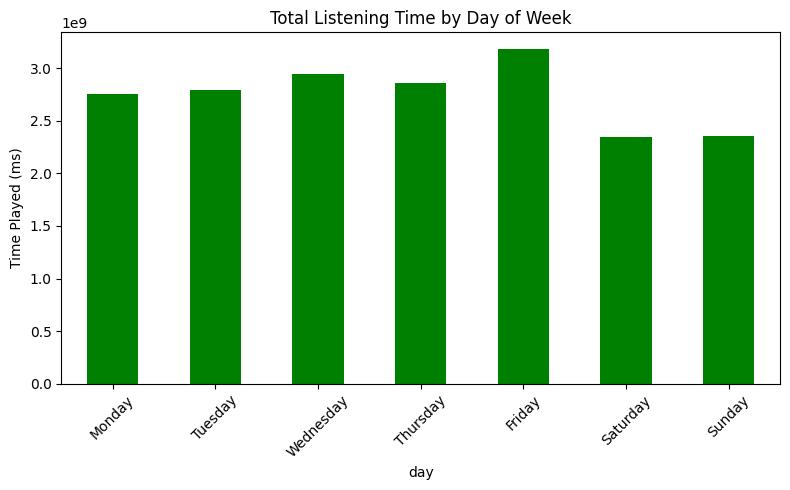

In [8]:
plays_by_day = df.groupby('day')['ms_played'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

plays_by_day.plot(kind='bar', color='green', figsize=(8,5))
plt.title('Total Listening Time by Day of Week')
plt.ylabel('Time Played (ms)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



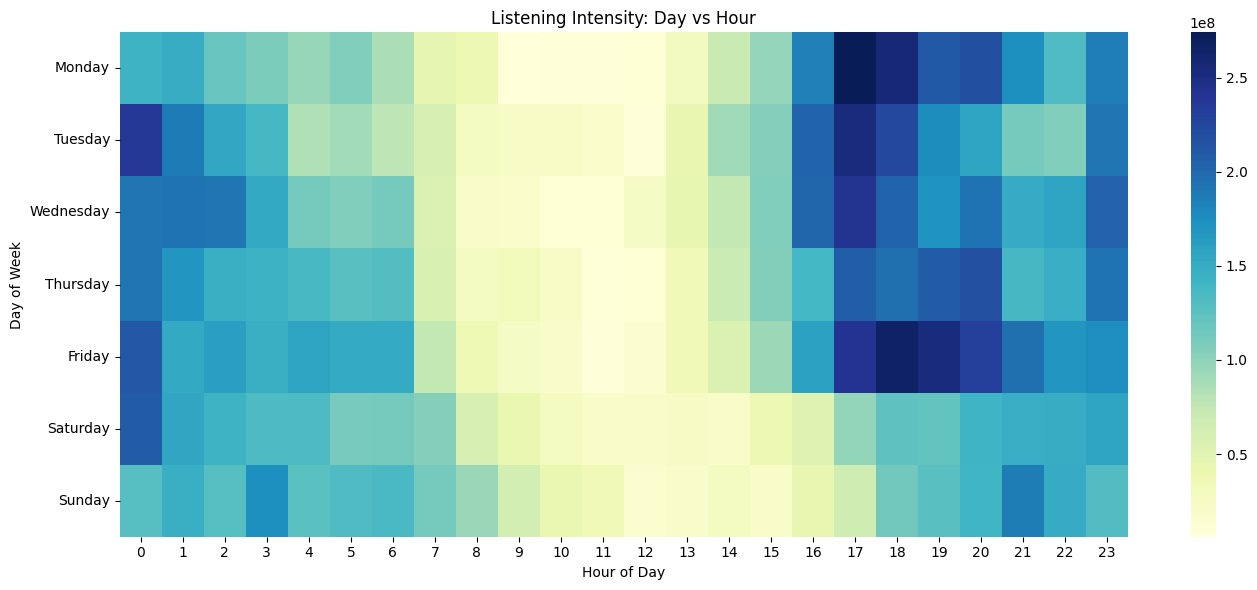

In [9]:
pivot_table = df.pivot_table(index='day', columns='hour', values='ms_played', aggfunc='sum')
# Order days
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(ordered_days)

plt.figure(figsize=(14,6))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Listening Intensity: Day vs Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()



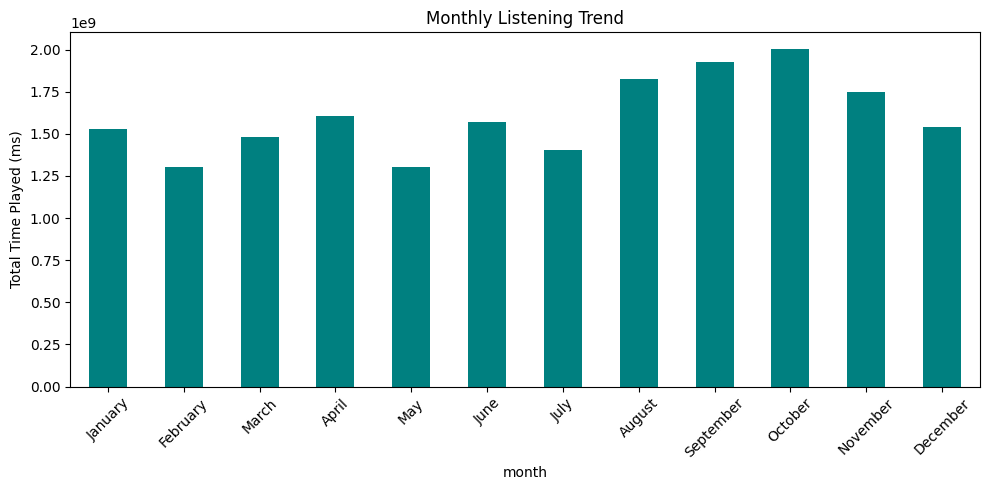

In [10]:
monthly_plays = df.groupby('month')['ms_played'].sum()
# Sort months in order
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
                'August', 'September', 'October', 'November', 'December']
monthly_plays = monthly_plays.reindex(months_order).dropna()

monthly_plays.plot(kind='bar', color='teal', figsize=(10,5))
plt.title('Monthly Listening Trend')
plt.ylabel('Total Time Played (ms)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


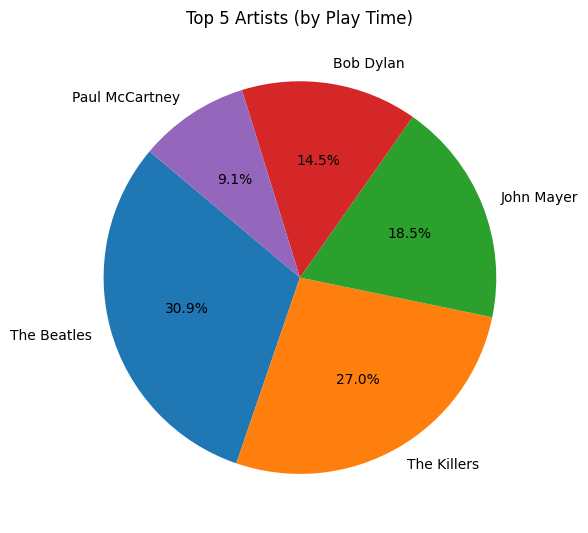

In [11]:
top_5_artists = df.groupby('artist_name')['ms_played'].sum().sort_values(ascending=False).head(5)
top_5_artists.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), startangle=140)
plt.title('Top 5 Artists (by Play Time)')
plt.ylabel('')
plt.tight_layout()
plt.show()


/var/folders/9z/6_dzxs196t3dk2_51vcgm0nm0000gn/T/ipykernel_2586/2598553505.py:7: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


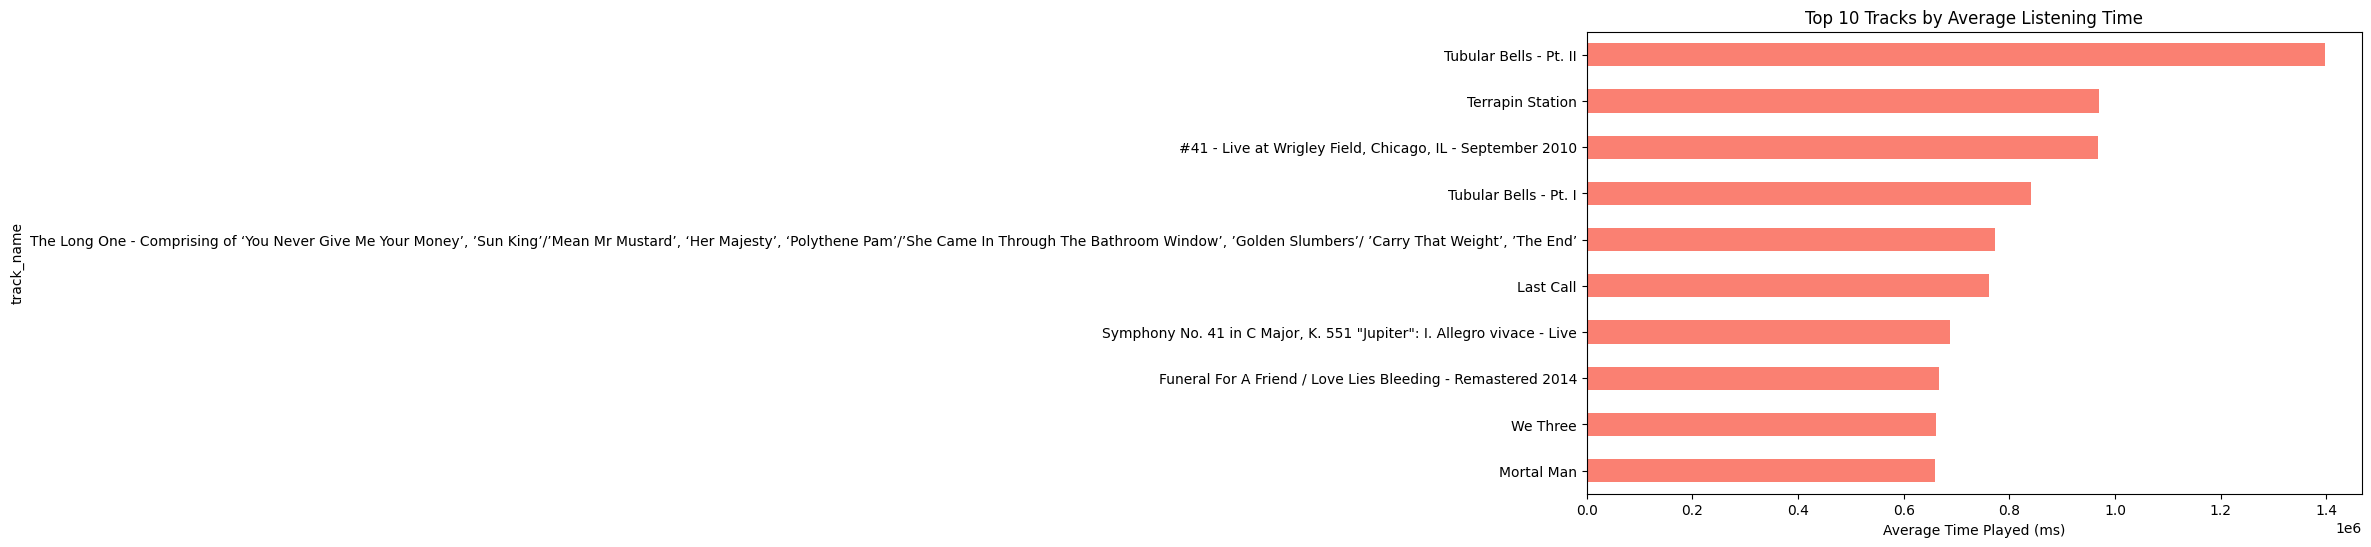

In [12]:
avg_play_time = df.groupby('track_name')['ms_played'].mean().sort_values(ascending=False).head(10)

avg_play_time.plot(kind='barh', figsize=(10, 6), color='salmon')
plt.title('Top 10 Tracks by Average Listening Time')
plt.xlabel('Average Time Played (ms)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


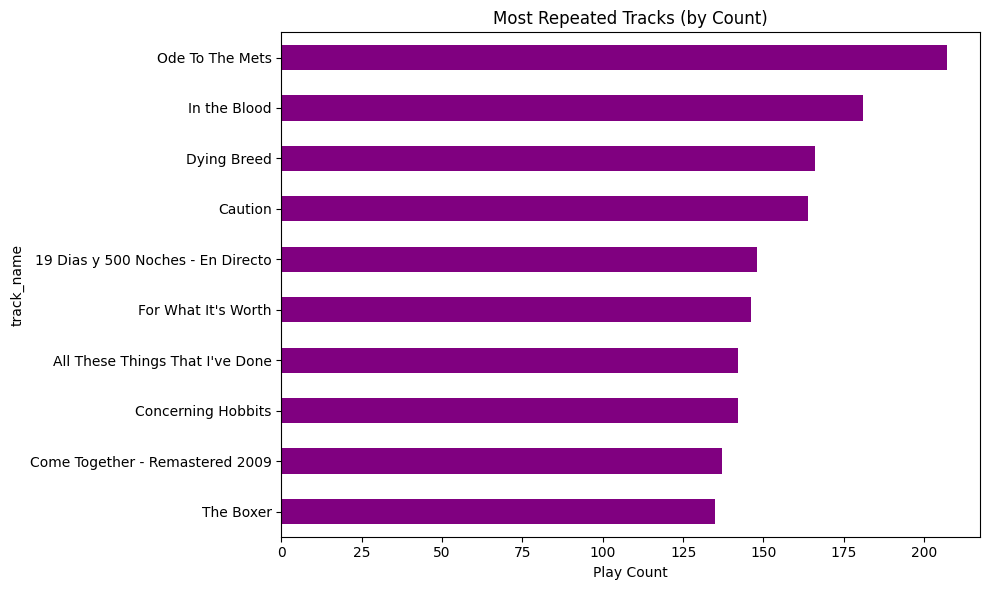

In [13]:
play_count = df['track_name'].value_counts().head(10)

play_count.plot(kind='barh', figsize=(10, 6), color='purple')
plt.title('Most Repeated Tracks (by Count)')
plt.xlabel('Play Count')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


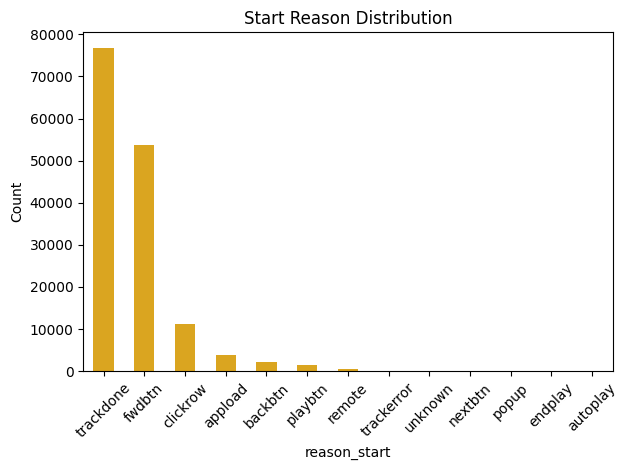

In [14]:
if 'reason_start' in df.columns:
    df['reason_start'].value_counts().plot(kind='bar', color='goldenrod')
    plt.title('Start Reason Distribution')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


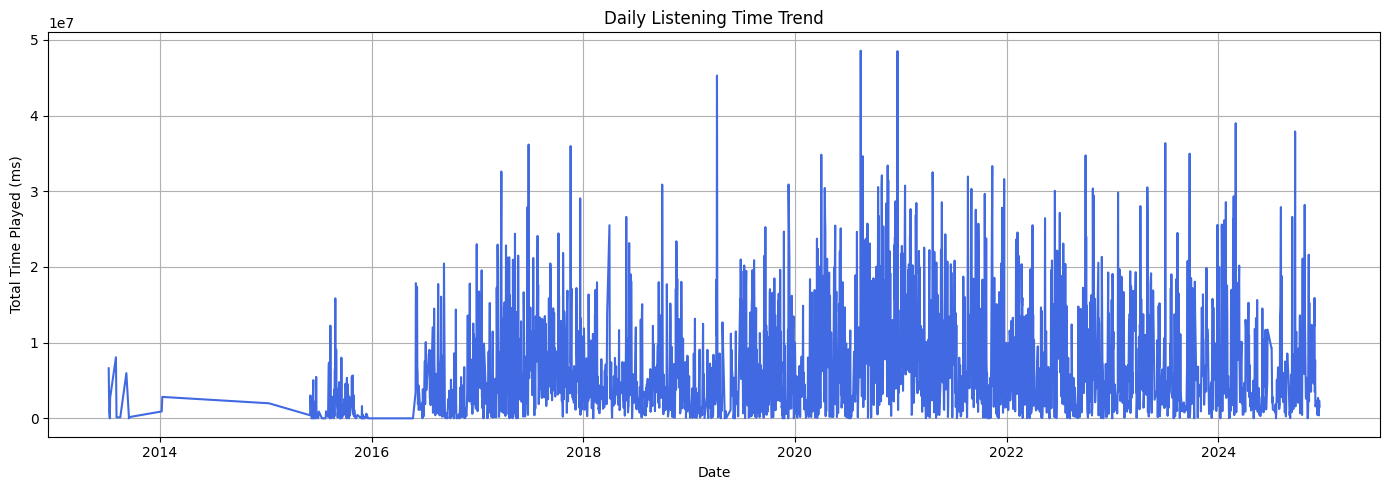

In [15]:
df['date'] = df['ts'].dt.date

daily_listening = df.groupby('date')['ms_played'].sum()

plt.figure(figsize=(14, 5))
daily_listening.plot(kind='line', color='royalblue')
plt.title('Daily Listening Time Trend')
plt.xlabel('Date')
plt.ylabel('Total Time Played (ms)')
plt.grid(True)
plt.tight_layout()
plt.show()


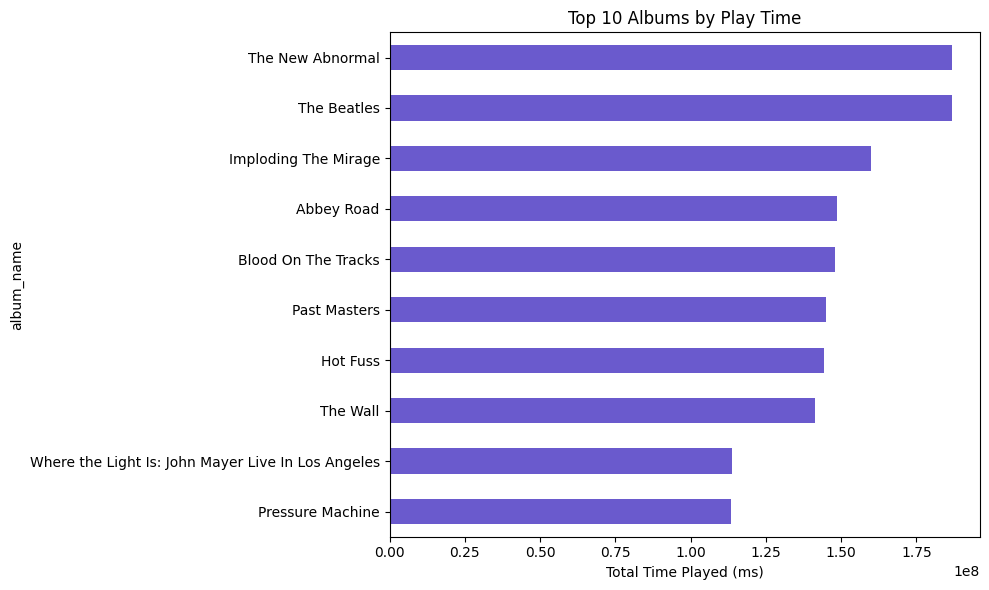

In [16]:
top_albums = df.groupby('album_name')['ms_played'].sum().sort_values(ascending=False).head(10)

top_albums.plot(kind='barh', figsize=(10, 6), color='slateblue')
plt.title('Top 10 Albums by Play Time')
plt.xlabel('Total Time Played (ms)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


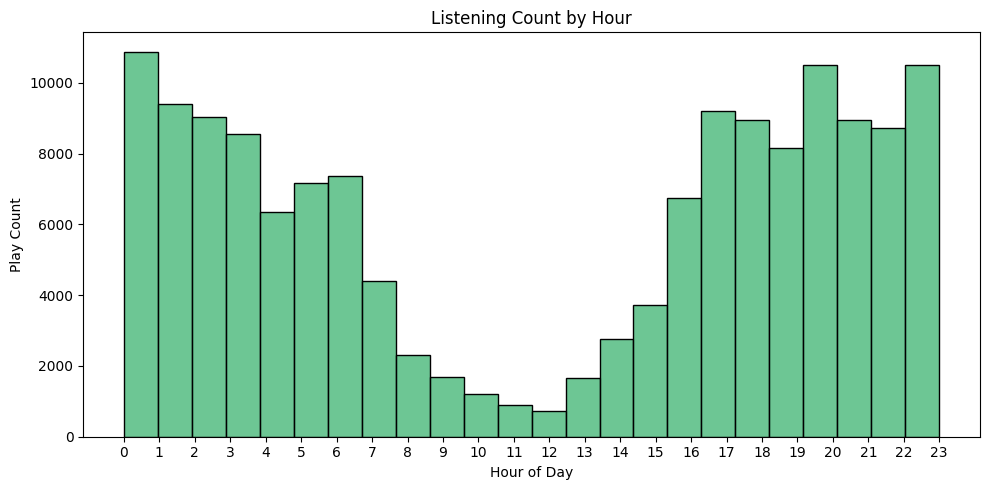

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(df['hour'], bins=24, kde=False, color='mediumseagreen')
plt.title('Listening Count by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Play Count')
plt.xticks(range(0,24))
plt.tight_layout()
plt.show()


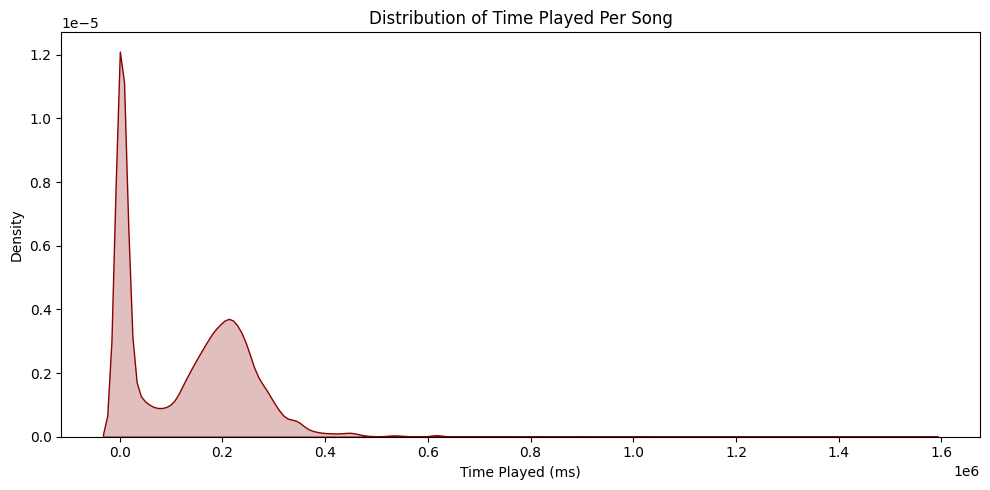

In [18]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df['ms_played'], fill=True, color='darkred')
plt.title('Distribution of Time Played Per Song')
plt.xlabel('Time Played (ms)')
plt.tight_layout()
plt.show()


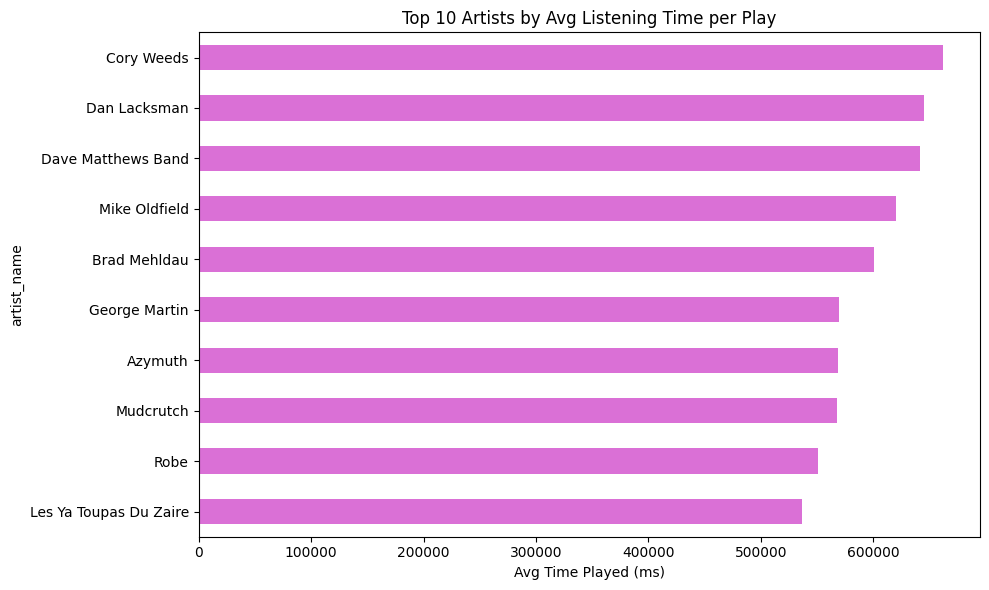

In [19]:
avg_artist = df.groupby('artist_name')['ms_played'].mean().sort_values(ascending=False).head(10)

avg_artist.plot(kind='barh', figsize=(10,6), color='orchid')
plt.title('Top 10 Artists by Avg Listening Time per Play')
plt.xlabel('Avg Time Played (ms)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [26]:
import pandas as pd
import numpy as np

# Load your data
df = pd.read_csv('spotify_history.csv')

# Drop fully empty and duplicate rows
df.dropna(how='all', inplace=True)
df.drop_duplicates(inplace=True)

# Display missing values
print("🕳️ Missing values:\n", df.isnull().sum())

# Drop rows with essential nulls
df.dropna(subset=['track_name', 'artist_name', 'ms_played', 'ts'], inplace=True)

# Convert timestamp to datetime
df['ts'] = pd.to_datetime(df['ts'], errors='coerce')
df.dropna(subset=['ts'], inplace=True)

# Extract time features
df['hour'] = df['ts'].dt.hour
df['day'] = df['ts'].dt.day_name()
df['month'] = df['ts'].dt.month_name()
df['date'] = df['ts'].dt.date

# Clean text columns
df['track_name'] = df['track_name'].str.strip().str.title()
df['artist_name'] = df['artist_name'].str.strip().str.title()
df['album_name'] = df['album_name'].str.strip().str.title()

# Remove songs with too short or too long play time (less than 5 sec or more than 1 hr)
df = df[(df['ms_played'] > 5000) & (df['ms_played'] < 3600000)]

# Fill missing values in optional columns if they exist
for col in ['reason_start', 'reason_end', 'platform']:
    if col in df.columns:
        df[col] = df[col].fillna('unknown').str.strip().str.lower()

# Reset index
df.reset_index(drop=True, inplace=True)

# Summary
print("✅ Cleaned data shape:", df.shape)
print("📊 Columns:", df.columns.tolist())
print("🧼 Preview:")
print(df.head())

# Save cleaned file
df.to_csv('spotify_history_cleaned.csv', index=False)


🕳️ Missing values:
 spotify_track_uri      0
ts                     0
platform               0
ms_played              0
track_name             0
artist_name            0
album_name             0
reason_start         143
reason_end           117
shuffle                0
skipped                0
dtype: int64
✅ Cleaned data shape: (104939, 15)
📊 Columns: ['spotify_track_uri', 'ts', 'platform', 'ms_played', 'track_name', 'artist_name', 'album_name', 'reason_start', 'reason_end', 'shuffle', 'skipped', 'hour', 'day', 'month', 'date']
🧼 Preview:
        spotify_track_uri                  ts    platform  ms_played  \
0  1oHxIPqJyvAYHy0PVrDU98 2013-07-08 02:45:37  web player      61865   
1  487OPlneJNni3NWC8SYqhW 2013-07-08 02:50:24  web player     285386   
2  5IyblF777jLZj1vGHG2UD3 2013-07-08 02:52:40  web player     134022   
3  50VNvhzyaSplJCKWchN7a8 2013-07-08 03:17:52  web player      63485   
4  07hII2Rc29q4F2nTE3P1od 2013-07-08 03:20:20  web player      67587   

                      

In [ ]:
import os
os.listdir()


['spotifyenv',
 'Untitled.ipynb',
 '.ipynb_checkpoints',
 'spotify_data_dictionary Description.csv',
 'spotify_history.csv']